## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap PING scan (aggressive)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_ping_scan_aggressive'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.056424
Name: time, dtype: float64

In [4]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    0.056424
1    0.059382
2    0.066616
3    0.590569
4    0.058769
5    0.054681
6    0.068748
7    0.069238
8    0.061920
9    0.152431
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp

,0
0,0.056424
1,0.059382
2,0.066616
3,0.590569
4,0.058769
5,0.054681
6,0.068748
7,0.069238
8,0.061920
9,0.152431


In [8]:
temp.mean()

0    0.123878
dtype: float64

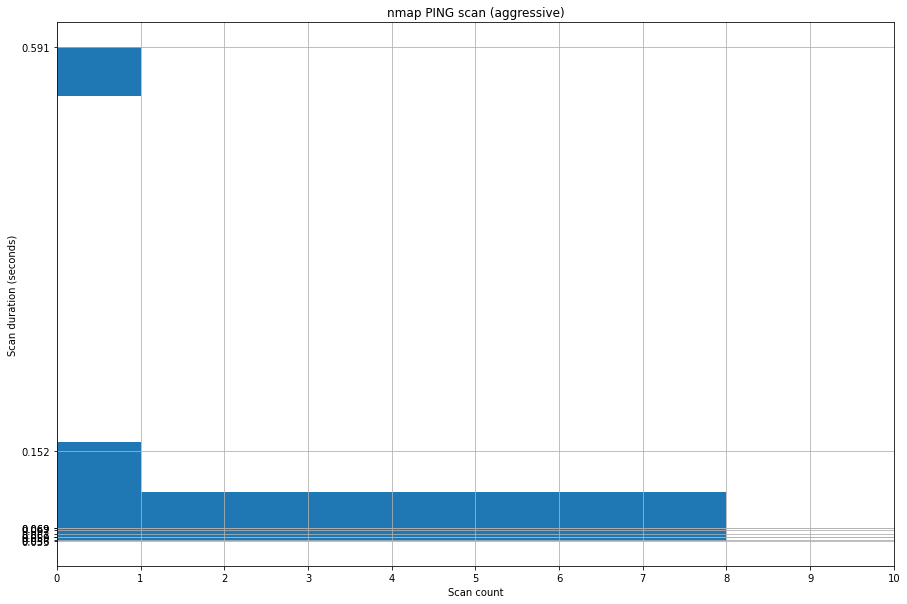

In [9]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [10]:
temp.describe()

,0
count,10.000000
mean,0.123878
std,0.166498
min,0.054681
25%,0.058922
50%,0.064268
75%,0.069115
max,0.590569


## Packet count

In [11]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [12]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [13]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 2477.555751800537



## Order of ports scanned


In [14]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 52160 3389
2 52160 995
3 52160 80
4 52160 199
5 52160 8080
6 52160 3306
7 52160 554
8 52160 110
9 52160 5900
10 52160 256
11 52160 1723
12 52160 143
13 52160 21
14 52160 22
15 52160 1025
16 52160 139
17 52160 135
18 52160 587
19 52160 1720
20 52160 25
21 52160 993
22 52160 53
23 52160 445
24 52160 111
25 52160 113
26 52160 8888
27 52160 23
28 52160 443
29 52160 5822
30 52160 1068
31 52160 2006
32 52160 1500
33 52160 4998
34 52160 1063
35 52160 6566
36 52160 5960
37 52160 5001
38 52160 2179
39 52160 6112
40 52160 8443
41 52160 15003
42 52160 54045
43 52160 32768
44 52160 9100
45 52160 2222
46 52160 2001
47 52160 255
48 52160 9010
49 52160 1097
50 52160 1688
51 52160 563
52 52160 2038
53 52160 1131
54 52160 62078
55 52160 34571
56 52160 7000
57 52160 49155
58 52160 1096
59 52160 720
60 52160 4129
61 52160 27356
62 52160 5825
63 52160 30000
64 52160 898
65 52160 1718
66 52160 27000
67 52160 1900
68 52160 11111
69 52160 3128
70 52160 18040
71 52160 49161
72 52160 32773
73 52160 6106
74 5

621 52160 20828
622 52160 5810
623 52160 44176
624 52160 4279
625 52160 6792
626 52160 406
627 52160 3826
628 52160 625
629 52160 2105
630 52160 7100
631 52160 9418
632 52160 40911
633 52160 5009
634 52160 7938
635 52160 27353
636 52160 5003
637 52160 8008
638 52160 50001
639 52160 3211
640 52160 16012
641 52160 15000
642 52160 7911
643 52160 2196
644 52160 6005
645 52160 32774
646 52160 1091
647 52160 1074
648 52160 5631
649 52160 1023
650 52160 5862
651 52160 3659
652 52160 1088
653 52160 1035
654 52160 70
655 52160 3221
656 52160 1040
657 52160 3325
658 52160 13722
659 52160 10621
660 52160 4443
661 52160 8222
662 52160 636
663 52160 6006
664 52160 1199
665 52160 222
666 52160 5961
667 52160 912
668 52160 20222
669 52160 1071
670 52160 16001
671 52160 125
672 52160 6156
673 52160 6669
674 52160 9103
675 52160 2399
676 52160 1187
677 52160 3800
678 52160 7106
679 52160 16080
680 52160 1259
681 52160 8085
682 52160 18988
683 52160 14441
684 52160 48080
685 52160 1840
686 52160 1272
68

788 49402 1092
789 49402 1049
790 49402 49400
791 49402 27356
792 49402 1296
793 49402 3801
794 49402 49157
795 49402 9200
796 49402 9593
797 49402 3869
798 49402 1248
799 49402 465
800 49402 6646
801 49402 5988
802 49402 32772
803 49402 2875
804 49402 1138
805 49402 8100
806 49402 9009
807 49402 179
808 49402 3551
809 49402 9876
810 49402 417
811 49402 2401
812 49402 16993
813 49402 1272
814 49402 2021
815 49402 2040
816 49402 32775
817 49402 27352
818 49402 49161
819 49402 1271
820 49402 55600
821 49402 49
822 49402 1310
823 49402 40911
824 49402 2030
825 49402 32784
826 49402 32774
827 49402 6668
828 49402 7070
829 49402 2100
830 49402 1164
831 49402 1102
832 49402 8300
833 49402 32776
834 49402 8008
835 49402 3351
836 49402 625
837 49402 17
838 49402 9575
839 49402 1503
840 49402 1863
841 49402 8083
842 49402 6669
843 49402 49163
844 49402 42
845 49402 9535
846 49402 1322
847 49402 1999
848 49402 5633
849 49402 1007
850 49402 2000
851 49402 8009
852 49402 5033
853 49402 311
854 494

454 35238 19801
455 35238 5087
456 35238 26214
457 35238 2135
458 35238 2048
459 35238 41511
460 35238 20000
461 35238 3493
462 35238 65389
463 35238 1066
464 35238 2065
465 35238 5100
466 35238 4004
467 35238 4343
468 35238 259
469 35238 1247
470 35238 32777
471 35238 8010
472 35238 749
473 35238 5101
474 35238 464
475 35238 6667
476 35238 1091
477 35238 6129
478 35238 38292
479 35238 7938
480 35238 2920
481 35238 7106
482 35238 1309
483 35238 18101
484 35238 16000
485 35238 9575
486 35238 3995
487 35238 8031
488 35238 1972
489 35238 16018
490 35238 55555
491 35238 17988
492 35238 1199
493 35238 7402
494 35238 2222
495 35238 254
496 35238 212
497 35238 2107
498 35238 481
499 35238 3261
500 35238 1334
501 35238 1839
502 35238 1063
503 35238 50500
504 35238 8292
505 35238 44176
506 35238 7200
507 35238 5002
508 35238 52869
509 35238 720
510 35238 49167
511 35238 17877
512 35238 10000
513 35238 2875
514 35238 1863
515 35238 2160
516 35238 5432
517 35238 1052
518 35238 1110
519 35238 4998

121 40371 2602
122 40371 5221
123 40371 6543
124 40371 5859
125 40371 8222
126 40371 1082
127 40371 1054
128 40371 5004
129 40371 49176
130 40371 7002
131 40371 1050
132 40371 9999
133 40371 16113
134 40371 32773
135 40371 3871
136 40371 24
137 40371 56737
138 40371 5989
139 40371 2718
140 40371 57797
141 40371 2701
142 40371 10004
143 40371 5633
144 40371 18988
145 40371 5566
146 40371 5678
147 40371 49
148 40371 1145
149 40371 1984
150 40371 880
151 40371 15000
152 40371 65389
153 40371 49155
154 40371 4006
155 40371 1755
156 40371 1352
157 40371 3268
158 40371 1111
159 40371 2800
160 40371 2106
161 40371 545
162 40371 2967
163 40371 5988
164 40371 2179
165 40371 1641
166 40371 6346
167 40371 999
168 40371 7920
169 40371 32779
170 40371 9011
171 40371 4
172 40371 1023
173 40371 7070
174 40371 8500
175 40371 55055
176 40371 7676
177 40371 64623
178 40371 8600
179 40371 2383
180 40371 512
181 40371 3995
182 40371 3766
183 40371 49154
184 40371 2020
185 40371 33899
186 40371 1067
187 40

787 40371 7103
788 40371 3077
789 40371 8701
790 40371 9917
791 40371 99
792 40371 3814
793 40371 843
794 40371 617
795 40371 3905
796 40371 5001
797 40371 2607
798 40371 2007
799 40371 5030
800 40371 2968
801 40371 56738
802 40371 2196
803 40371 1039
804 40371 1600
805 40371 6565
806 40371 1066
807 40371 15002
808 40371 44501
809 40371 1658
810 40371 9418
811 40371 5214
812 40371 1102
813 40371 3659
814 40371 1069
815 40371 19350
816 40371 5802
817 40371 1236
818 40371 301
819 40371 1075
820 40371 5500
821 40371 2875
822 40371 2725
823 40371 3971
824 40371 3324
825 40371 1974
826 40371 2107
827 40371 1151
828 40371 3168
829 40371 5906
830 40371 3551
831 40371 1095
832 40371 6901
833 40371 3006
834 40371 44176
835 40371 16080
836 40371 3322
837 40371 5510
838 40371 9111
839 40371 1052
840 40371 55555
841 40371 1199
842 40371 20
843 40371 2047
844 40371 5101
845 40371 6567
846 40371 64680
847 40371 2099
848 40371 24444
849 40371 2288
850 40371 911
851 40371 515
852 40371 20828
853 40371

454 51900 9594
455 51900 55056
456 51900 2013
457 51900 8042
458 51900 5959
459 51900 1029
460 51900 843
461 51900 1248
462 51900 2179
463 51900 23502
464 51900 49159
465 51900 8291
466 51900 6502
467 51900 4567
468 51900 32779
469 51900 3005
470 51900 9290
471 51900 8031
472 51900 5801
473 51900 5009
474 51900 15660
475 51900 40911
476 51900 2144
477 51900 6
478 51900 1533
479 51900 7001
480 51900 1233
481 51900 1072
482 51900 1328
483 51900 666
484 51900 10004
485 51900 1862
486 51900 714
487 51900 3517
488 51900 163
489 51900 1812
490 51900 8088
491 51900 7496
492 51900 1058
493 51900 1218
494 51900 4242
495 51900 2034
496 51900 50800
497 51900 20
498 51900 5960
499 51900 17877
500 51900 1094
501 51900 20000
502 51900 1296
503 51900 6100
504 51900 32771
505 51900 32781
506 51900 9575
507 51900 555
508 51900 10025
509 51900 2725
510 51900 5080
511 51900 5560
512 51900 50001
513 51900 648
514 51900 34573
515 51900 9876
516 51900 5903
517 51900 2001
518 51900 9666
519 51900 515
520 519

120 41422 9103
121 41422 6881
122 41422 6003
123 41422 55056
124 41422 9876
125 41422 54045
126 41422 24
127 41422 6510
128 41422 9535
129 41422 1073
130 41422 1201
131 41422 1272
132 41422 23502
133 41422 666
134 41422 2601
135 41422 2191
136 41422 30951
137 41422 20005
138 41422 5850
139 41422 10215
140 41422 1105
141 41422 1047
142 41422 16113
143 41422 10621
144 41422 32
145 41422 9944
146 41422 3689
147 41422 5102
148 41422 668
149 41422 1163
150 41422 14441
151 41422 32771
152 41422 27715
153 41422 1062
154 41422 19101
155 41422 7911
156 41422 873
157 41422 7007
158 41422 1217
159 41422 5730
160 41422 687
161 41422 1503
162 41422 5221
163 41422 2144
164 41422 1984
165 41422 3011
166 41422 44442
167 41422 10002
168 41422 13783
169 41422 12265
170 41422 722
171 41422 366
172 41422 9207
173 41422 3269
174 41422 5678
175 41422 2525
176 41422 3880
177 41422 417
178 41422 18988
179 41422 1081
180 41422 161
181 41422 9900
182 41422 37
183 41422 3527
184 41422 2006
185 41422 8002
186 414

787 41422 10012
788 41422 3325
789 41422 801
790 41422 3995
791 41422 5906
792 41422 4443
793 41422 2041
794 41422 1864
795 41422 5825
796 41422 648
797 41422 8090
798 41422 8292
799 41422 9415
800 41422 4045
801 41422 14238
802 41422 15003
803 41422 2030
804 41422 16993
805 41422 497
806 41422 7435
807 41422 1149
808 41422 57294
809 41422 3814
810 41422 3404
811 41422 1234
812 41422 987
813 41422 5500
814 41422 2126
815 41422 1433
816 41422 4005
817 41422 1761
818 41422 1132
819 41422 981
820 41422 3322
821 41422 8089
822 41422 88
823 41422 125
824 41422 9929
825 41422 513
826 41422 5666
827 41422 9000
828 41422 19801
829 41422 636
830 41422 3851
831 41422 1154
832 41422 9099
833 41422 84
834 41422 2998
835 41422 1244
836 41422 3077
837 41422 544
838 41422 8000
839 41422 2179
840 41422 1148
841 41422 3017
842 41422 55555
843 41422 3367
844 41422 9943
845 41422 15002
846 41422 65389
847 41422 1036
848 41422 2111
849 41422 3878
850 41422 500
851 41422 407
852 41422 4001
853 41422 1352
8

453 34508 49154
454 34508 2717
455 34508 1089
456 34508 4002
457 34508 49163
458 34508 58080
459 34508 722
460 34508 5101
461 34508 2000
462 34508 1064
463 34508 5811
464 34508 55056
465 34508 617
466 34508 1322
467 34508 8899
468 34508 7201
469 34508 4003
470 34508 8873
471 34508 1984
472 34508 7676
473 34508 5200
474 34508 464
475 34508 7911
476 34508 9968
477 34508 1124
478 34508 106
479 34508 1935
480 34508 5910
481 34508 2608
482 34508 9220
483 34508 119
484 34508 50001
485 34508 1082
486 34508 5357
487 34508 1521
488 34508 1108
489 34508 125
490 34508 1096
491 34508 1056
492 34508 9002
493 34508 50636
494 34508 14000
495 34508 2998
496 34508 7800
497 34508 5825
498 34508 2049
499 34508 12345
500 34508 8654
501 34508 9900
502 34508 1352
503 34508 5902
504 34508 10215
505 34508 1031
506 34508 8022
507 34508 524
508 34508 40911
509 34508 2006
510 34508 5952
511 34508 5850
512 34508 5051
513 34508 9594
514 34508 2126
515 34508 1600
516 34508 9898
517 34508 1023
518 34508 32776
519 34

120 63256 9900
121 63256 8099
122 63256 722
123 63256 16016
124 63256 4003
125 63256 13782
126 63256 4848
127 63256 7911
128 63256 49153
129 63256 3351
130 63256 5631
131 63256 5226
132 63256 903
133 63256 8010
134 63256 32782
135 63256 2702
136 63256 30000
137 63256 1163
138 63256 1091
139 63256 2033
140 63256 1443
141 63256 2260
142 63256 19780
143 63256 10000
144 63256 5901
145 63256 32777
146 63256 2048
147 63256 1233
148 63256 2638
149 63256 726
150 63256 5666
151 63256 32779
152 63256 8291
153 63256 14238
154 63256 2602
155 63256 8093
156 63256 8007
157 63256 49161
158 63256 2046
159 63256 5907
160 63256 49157
161 63256 1076
162 63256 5960
163 63256 1187
164 63256 1524
165 63256 1138
166 63256 1110
167 63256 10778
168 63256 5915
169 63256 1149
170 63256 5221
171 63256 3390
172 63256 4111
173 63256 1117
174 63256 8181
175 63256 32768
176 63256 8443
177 63256 5102
178 63256 7100
179 63256 13456
180 63256 6006
181 63256 2875
182 63256 512
183 63256 1199
184 63256 6000
185 63256 9415

786 63256 10003
787 63256 787
788 63256 2701
789 63256 119
790 63256 49167
791 63256 555
792 63256 1164
793 63256 16001
794 63256 34572
795 63256 2042
796 63256 81
797 63256 49158
798 63256 5633
799 63256 1503
800 63256 3300
801 63256 6001
802 63256 543
803 63256 6101
804 63256 481
805 63256 3333
806 63256 15003
807 63256 44442
808 63256 8333
809 63256 9503
810 63256 1328
811 63256 1075
812 63256 4279
813 63256 3017
814 63256 5544
815 63256 9071
816 63256 89
817 63256 49160
818 63256 14000
819 63256 3918
820 63256 3005
821 63256 264
822 63256 1099
823 63256 10626
824 63256 7402
825 63256 4899
826 63256 6901
827 63256 1067
828 63256 3869
829 63256 1154
830 63256 33899
831 63256 64623
832 63256 3689
833 63256 15742
834 63256 1026
835 63256 12345
836 63256 8600
837 63256 5061
838 63256 9207
839 63256 6543
840 63256 54045
841 63256 13
842 63256 2103
843 63256 2022
844 63256 16993
845 63256 50001
846 63256 311
847 63256 2010
848 63256 2710
849 63256 20222
850 63256 683
851 63256 10628
852 6

453 56582 444
454 56582 1914
455 56582 2323
456 56582 1106
457 56582 1057
458 56582 1503
459 56582 27352
460 56582 49176
461 56582 8031
462 56582 6100
463 56582 1199
464 56582 2920
465 56582 13456
466 56582 49999
467 56582 1105
468 56582 3322
469 56582 1213
470 56582 2103
471 56582 1974
472 56582 3945
473 56582 2800
474 56582 5915
475 56582 9091
476 56582 1218
477 56582 3998
478 56582 5030
479 56582 9999
480 56582 8086
481 56582 5440
482 56582 1322
483 56582 63331
484 56582 49157
485 56582 1310
486 56582 2038
487 56582 6123
488 56582 9010
489 56582 31337
490 56582 1035
491 56582 7777
492 56582 683
493 56582 15004
494 56582 18040
495 56582 45100
496 56582 2196
497 56582 1082
498 56582 5904
499 56582 1971
500 56582 4900
501 56582 9110
502 56582 714
503 56582 6005
504 56582 5280
505 56582 4001
506 56582 81
507 56582 1839
508 56582 3827
509 56582 5051
510 56582 51493
511 56582 13
512 56582 1049
513 56582 44443
514 56582 5226
515 56582 2191
516 56582 9290
517 56582 5666
518 56582 1138
519 5

44 45713 777
45 45713 280
46 45713 2068
47 45713 8085
48 45713 668
49 45713 49163
50 45713 8021
51 45713 3880
52 45713 306
53 45713 7002
54 45713 9103
55 45713 3998
56 45713 617
57 45713 32777
58 45713 5054
59 45713 1037
60 45713 9090
61 45713 1501
62 45713 6901
63 45713 10082
64 45713 4242
65 45713 4045
66 45713 6668
67 45713 1067
68 45713 12000
69 45713 49159
70 45713 5269
71 45713 2001
72 45713 161
73 45713 18988
74 45713 1328
75 45713 6156
76 45713 62078
77 45713 13456
78 45713 4125
79 45713 24444
80 45713 49167
81 45713 3300
82 45713 2022
83 45713 32776
84 45713 3995
85 45713 2006
86 45713 3006
87 45713 32780
88 45713 12265
89 45713 1947
90 45713 9011
91 45713 7019
92 45713 687
93 45713 10024
94 45713 5190
95 45713 8007
96 45713 9666
97 45713 5999
98 45713 9001
99 45713 4005
100 45713 3971
101 45713 389
102 45713 55600
103 45713 1149
104 45713 19
105 45713 5001
106 45713 3476
107 45713 513
108 45713 5000
109 45713 51493
110 45713 1217
111 45713 9110
112 45713 800
113 45713 2701
11

786 45713 843
787 45713 1009
788 45713 3077
789 45713 1352
790 45713 5414
791 45713 8873
792 45713 1141
793 45713 49161
794 45713 1272
795 45713 3283
796 45713 26
797 45713 1580
798 45713 3404
799 45713 9898
800 45713 16992
801 45713 1216
802 45713 99
803 45713 3801
804 45713 9944
805 45713 1700
806 45713 7
807 45713 6547
808 45713 20221
809 45713 1084
810 45713 1054
811 45713 683
812 45713 2035
813 45713 3013
814 45713 2002
815 45713 1066
816 45713 7921
817 45713 1030
818 45713 5907
819 45713 11110
820 45713 5950
821 45713 1048
822 45713 1183
823 45713 1108
824 45713 163
825 45713 6580
826 45713 4848
827 45713 636
828 45713 56738
829 45713 89
830 45713 3371
831 45713 34571
832 45713 1126
833 45713 3128
834 45713 49175
835 45713 992
836 45713 18101
837 45713 1090
838 45713 563
839 45713 1095
840 45713 4111
841 45713 9
842 45713 2099
843 45713 3005
844 45713 2725
845 45713 9100
846 45713 2607
847 45713 19315
848 45713 3323
849 45713 911
850 45713 6566
851 45713 49176
852 45713 9876
853 

In [15]:
orders_port

,scannr,sport,dport
0,1,52160,3389
1,2,52160,995
2,3,52160,80
3,4,52160,199
4,5,52160,8080
...,...,...,...
9995,996,45713,32768
9996,997,45713,465
9997,998,45713,9101
9998,999,45713,20222


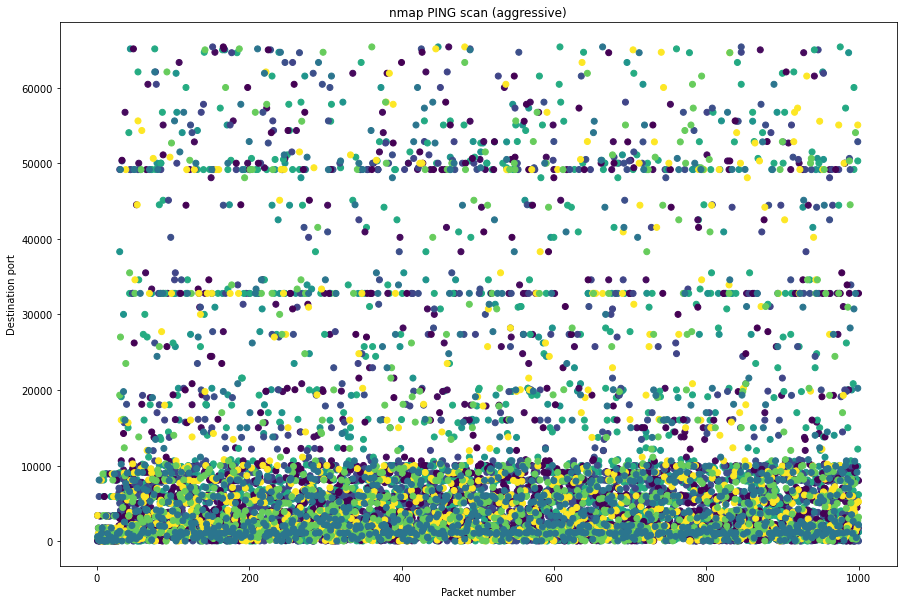

In [16]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [17]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [18]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

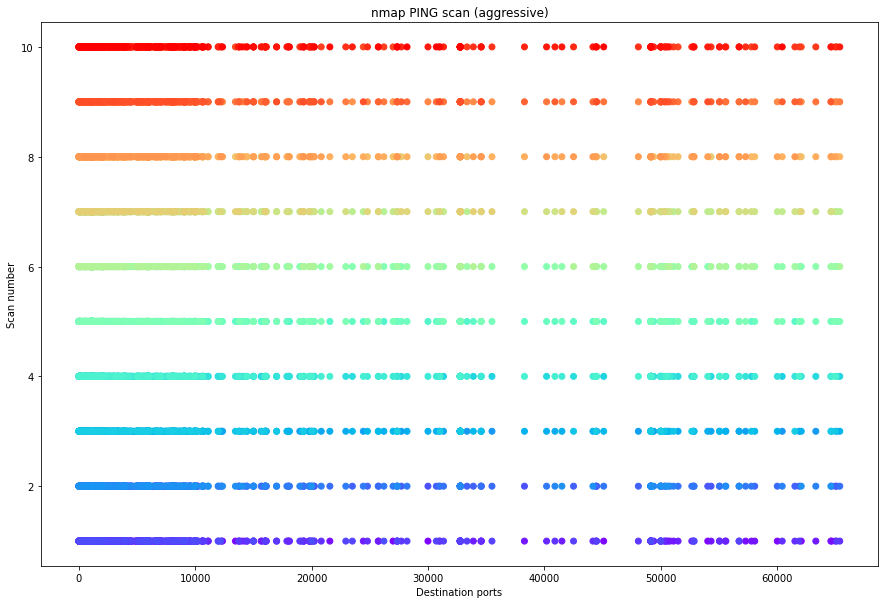

In [19]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

In [20]:
unused_ports = []
used_ports = []
for x in range(1, 65536):
    if x not in tcp_dports:
        unused_ports.append(x)
    elif x in tcp_dports:
        used_ports.append(x)

In [21]:
print(len(unused_ports))

64535


In [22]:
print(len(used_ports))

1000


In [23]:
set(orders_port['dport'])

{32768,
 49153,
 49152,
 49155,
 32772,
 32773,
 49157,
 6,
 2048,
 49161,
 32777,
 49163,
 32780,
 13,
 49165,
 49167,
 32784,
 17,
 32779,
 4111,
 20,
 21,
 22,
 23,
 49175,
 25,
 26,
 2068,
 24,
 4,
 8222,
 4125,
 32,
 4129,
 33,
 30,
 7,
 37,
 4126,
 1,
 42,
 43,
 45100,
 9,
 49,
 2099,
 2100,
 53,
 2103,
 12345,
 2106,
 2107,
 2105,
 8254,
 2111,
 70,
 2119,
 2049,
 2121,
 2126,
 79,
 80,
 3,
 81,
 83,
 84,
 85,
 82,
 2135,
 88,
 89,
 90,
 61532,
 19,
 2144,
 8290,
 8291,
 100,
 8292,
 99,
 14441,
 14442,
 106,
 8300,
 109,
 110,
 111,
 2160,
 113,
 2161,
 119,
 2170,
 125,
 4224,
 2179,
 135,
 139,
 8333,
 2190,
 143,
 2191,
 144,
 4242,
 146,
 2196,
 2065,
 2200,
 161,
 163,
 2222,
 27715,
 179,
 4279,
 8383,
 199,
 6346,
 2251,
 8400,
 8402,
 211,
 2260,
 212,
 222,
 24800,
 4321,
 30951,
 2288,
 6389,
 4343,
 49400,
 8443,
 6156,
 2301,
 255,
 256,
 8192,
 254,
 55555,
 259,
 8193,
 264,
 8194,
 2323,
 280,
 51493,
 8200,
 301,
 55600,
 306,
 8500,
 311,
 31038,
 2366,
 10566,

## Payloads

In [24]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

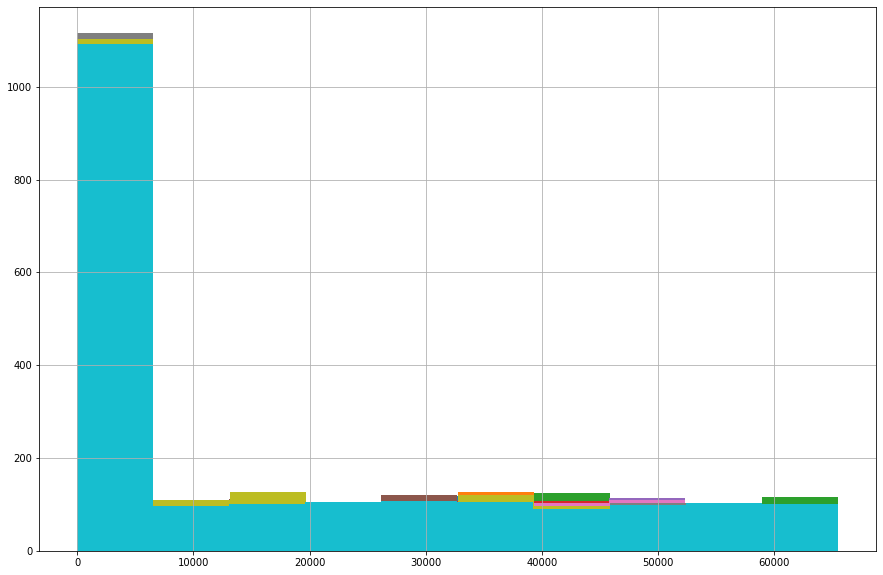

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

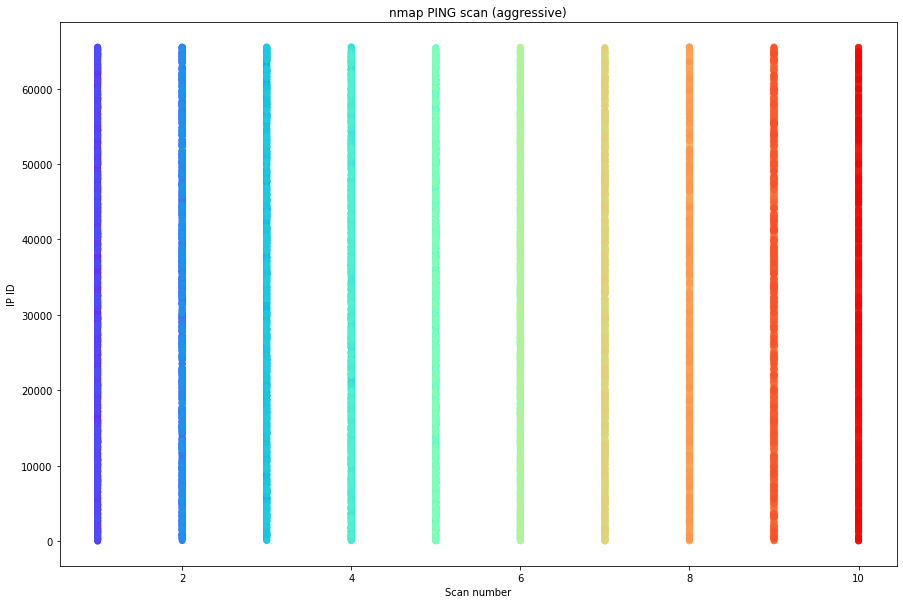

In [26]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


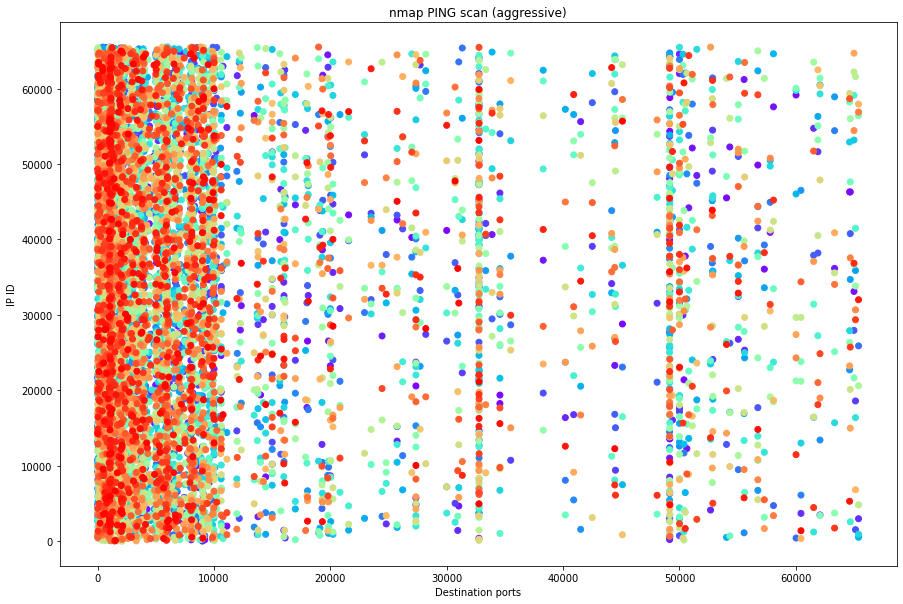

In [27]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

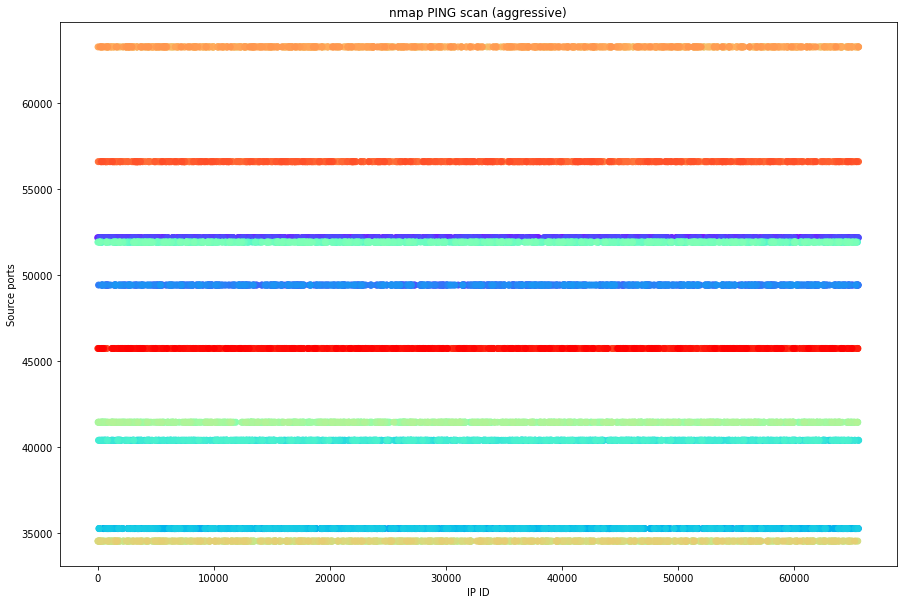

In [28]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [29]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
-----
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Pack

## TCP Window size

In [30]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [31]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
Sequence number: 442214869
S

Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 405

Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 4053255282
Sequence number: 405

Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
Sequence number: 742015853
S

Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 2662542810
Sequence number: 266

Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 105

Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 1056345254
Sequence number: 105

Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 4153851997
Sequence number: 415

Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 2794856567
Sequence number: 279

Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 369

Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 3692274267
Sequence number: 369

Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 1309940200
Sequence number: 130

Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 1181627612
Sequence number: 118

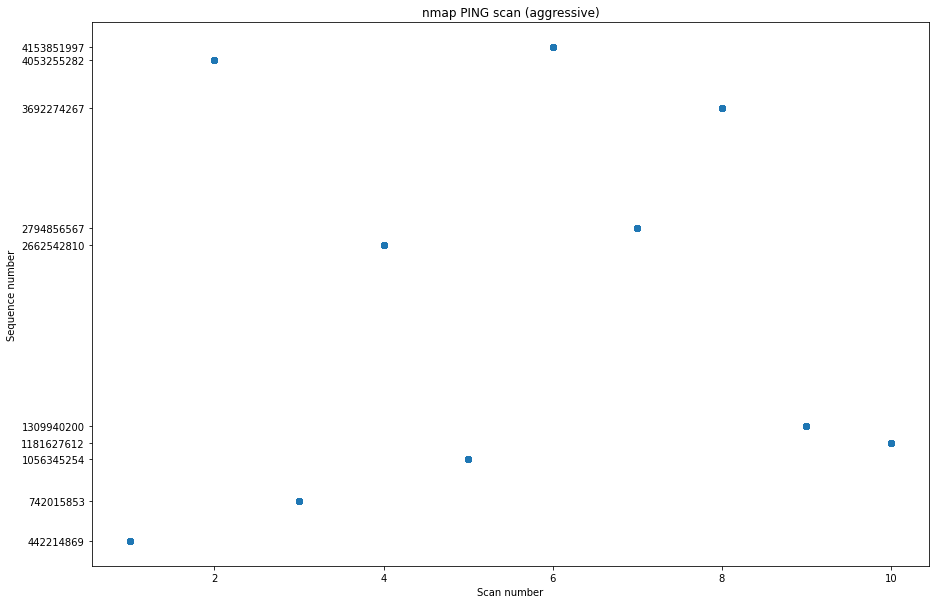

In [32]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


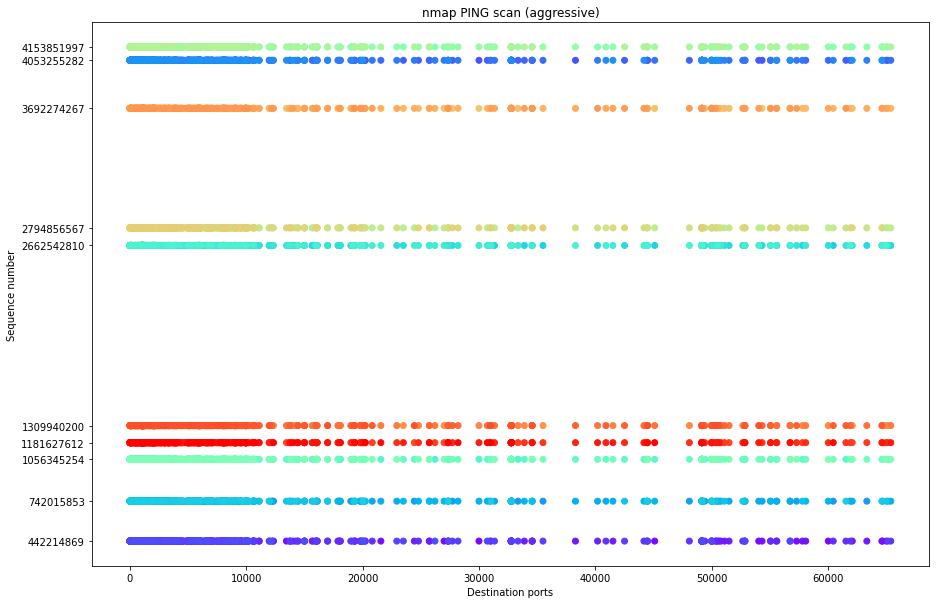

In [33]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

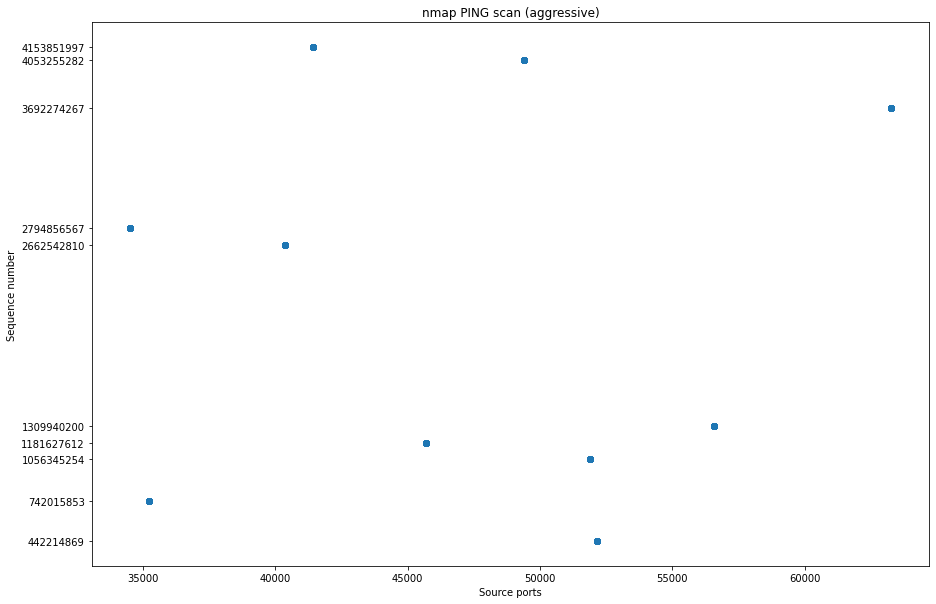

In [34]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [35]:
len(set(orders_port['sport']))

10

## Flags

In [36]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
-----
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flag

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F